<h1><center>Capstone Project</center></h1>

## Exploring the Best Places to Establish a Chinese Restaurant in Toronto

### Index

<ol>
    <li>Introduction</li>
    <li>Data Section</li>
    <li>Methodology</li>
    <li>Results</li>
    <li>Conclusion</li>
</ol>

## 1. Introduction

<p>Toronto, the capital of the province of Ontario, is a major Canadian city along Lake Ontario’s northwestern shore. Toronto also has many green spaces, from the orderly oval of Queen’s Park to 400-acre High Park and its trails, sports facilities and zoo.</p>

<p>Toronto is a city with a high population and population density, as per <a href="https://en.wikipedia.org/wiki/Chinese_Canadians" target="_blank">Wikipedia Page</a> about <b>631,050</b> Chinese lives in Toronto. In order to open a Chinese restaurant in Toronto we first need to identify places or venues which will be more suitable for us to open this restaurant to make it a profitable business.</p>

<p>If we think of above problem we can start from finding the best possible neighborhood for establishing a Chinese restaurant in Toronto city based on the number of Chinese restaurants in the vicinity of the chosen spot, i.e. choosing a neighborhood with minimum competition and coming up with a few suggestive neighbourhoods that have business potential in terms of opening a new Chinese restaurant.</p>

<p>When an invester dream about doing investments into opening Restaurants, one of the important question is try to find best possible place or area with one of the least competition. In this project we will locate such places which are ideal for opening a Chinese Restaurant.</p>

<p>This project will help two types of target audiences, first Individuals/Investers who are trying to establish new Restaurant business by finding areas which has low number of Chinese restaurants and secondly tourists e.g. Asian tourists or people who like Chinese food to help them choosing neighborhoods with easy accessibility.</p>

## 2. Data Section

<p>The required data set can be acquired from different data sources. The three data sources are listed below:</p>

<li><a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" target="_blank">Wikipedia</a> to fetch boroughs and neighborhoods of Toronto.</li>
<li>A .csv file <a href="https://cocl.us/Geospatial_data" target="_blank">https://cocl.us/Geospatial_data</a> to fetch latitudes and longitudes corresponding to each postal code.</li>
<li>The <a href="https://developer.foursquare.com/" target="_blank">Foursquare API</a> to fetch different public venues in the vicinity of the neighborhood.</li>

<p>The Wikipedia page contains a table of postal codes followed in Toronto, along with the boroughs and neighbourhoods in Toronto city. The <b>.csv file</b> provides us with the latitude and longitude co-ordinates of each postal code followed in the region of Toronto. This data is beneficial since these co-ordinates are then used with the <b>FourSquare API</b> to give out a list of popular venues in each neighbourhood.
The data is comprehensive, and yields valuable insights related to Toronto city that eventually helped us in unearthing conclusive results and observations. The data source, as it is perceived at the start of the project is unclean and required intensive pre-processing in order to convert it to a working set, capable of handling machine learning algorithms and visualization operations that were implemented on it. </p>

### 2.1 Data Pre-Processing

#### First Data Source

<p>First of all we will scrape data from Wikipedia page into our <i>pandas</i> dataframe</p>

In [4]:
# Importing libraries
import pandas as pd
import numpy as np

In [8]:
# Url to Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data_table = pd.read_html(url)
df=data_table[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [9]:
# Shape of our dataframe
df.shape

(180, 3)

<p>We don't needs <b>Boroughs</b> having value <i>Not assigned</i>, so we will remove them from our dataframe</p>

In [10]:
df = df[df.Borough != 'Not assigned']

<p>Now we will sort our dataframe with respect to <b>Postal Code</b>, <b>Borough</b> and reset indexes.</p>

In [12]:
df = df.sort_values(by = ['Postal Code','Borough'])
df.reset_index(inplace=True)
df.drop('index', axis = 1, inplace = True)
df.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


#### Second Data Source

<p>Now we will use our second data source, and import our data for Longitudes and Latitudes</p>

In [15]:
dt = pd.read_csv('https://cocl.us/Geospatial_data')
dt.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


<p>Merging above dataframe with our original dataframe so that against each Postal Code we have Latitude and Longitude values set</p>

In [16]:
df=pd.merge(df, dt, on='Postal Code')
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


<p>Hence as our Data Pre-Processing is done and dataframe is now ready for Data Analysis.</p>

## 3. Methodology

<p>In this section we will explore methodologies we will use in this project, i.e. data analysis and statistical and machine learning approaches we will use on our above data</p>

### 3.1 Data Analysis

In [20]:
boroughs=df['Borough'].unique()
boroughs

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke'], dtype=object)

<p>Above we got all 10 Boroughs of Toronto City, now we will analyize each Borough one by one</p>

<p>First we will import all required libraries which we will be using next.</p>

In [22]:
import numpy as np
import pandas as pd # 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

<p>Using FourSquare API</p>

In [23]:
CLIENT_ID = 'IOXUDFQZQQ4QCB45PYU3U0QDPKABOHB2QQ4AHGBNQL0DJ041' 
CLIENT_SECRET = 'QHGENDMQVHK2BNZBXSLCNHHWOKERW151FGEJ30421HUJCDJM'
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IOXUDFQZQQ4QCB45PYU3U0QDPKABOHB2QQ4AHGBNQL0DJ041
CLIENT_SECRET:QHGENDMQVHK2BNZBXSLCNHHWOKERW151FGEJ30421HUJCDJM


#### 1. Scarborough

<p>Following section we will explore Scarborough and do data analysis on it</p>

In [24]:
scarborough_df = df[df['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


<p>We will now get into more detail and extract venues in terms of the neighborhood that they belong to:</p>

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
scarborough_venues = getNearbyVenues(names=scarborough_df['Neighborhood'],
                                   latitudes=scarborough_df['Latitude'],
                                   longitudes=scarborough_df['Longitude']
                                  )

scarborough_venues.shape

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge


(86, 7)

In [29]:
scarborough_venues['Venue Category'].unique()
scarborough_venue_count=scarborough_venues['Venue Category'].value_counts().to_frame()
scarborough_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Coffee Shop,4
Chinese Restaurant,4
Breakfast Spot,4
Bank,4
Bakery,4
Fast Food Restaurant,3
Pizza Place,3
Intersection,2
Electronics Store,2
Thai Restaurant,2


<p>Now we will plot each venue category on barplot for better view</p>

In [30]:
# Importing required libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

Text(0, 0.5, 'Count')

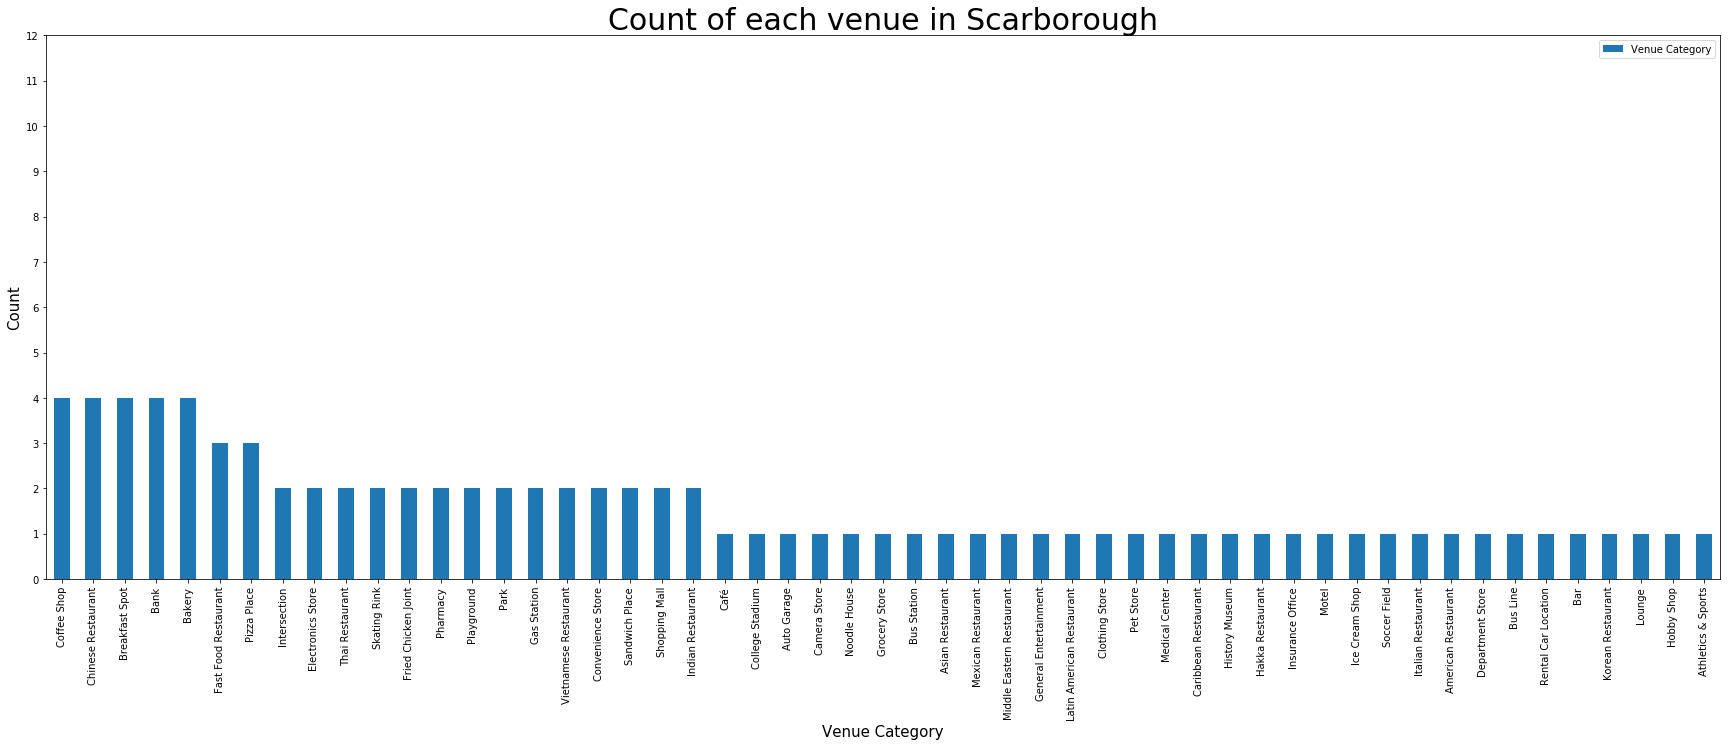

In [31]:
import math
yint = range(0,13)
scarborough_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Scarborough',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 2. North York

In [32]:
northyork_df = df[df['Borough'] == 'North York'].reset_index(drop=True)
northyork_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493


<p>We will now explore the neighborhoods of North York for different Venues</p>

In [34]:
northyork_venues = getNearbyVenues(names=northyork_df['Neighborhood'],
                                   latitudes=northyork_df['Latitude'],
                                   longitudes=northyork_df['Longitude']
                                  )

Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Bedford Park, Lawrence Manor East
Lawrence Manor, Lawrence Heights
Glencairn
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Humberlea, Emery


In [35]:
northyork_venues.shape

(248, 7)

<p>Displying different venues categories for North York</p>

In [37]:
northyork_venues['Venue Category'].unique()
northyork_venue_count=northyork_venues['Venue Category'].value_counts().to_frame()
northyork_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Coffee Shop,17
Clothing Store,11
Restaurant,9
Japanese Restaurant,8
Pizza Place,8
Sandwich Place,7
Bank,7
Park,7
Grocery Store,6
Café,5


<p>Graphically Plotting above results to barplot</p>

Text(0, 0.5, 'Count')

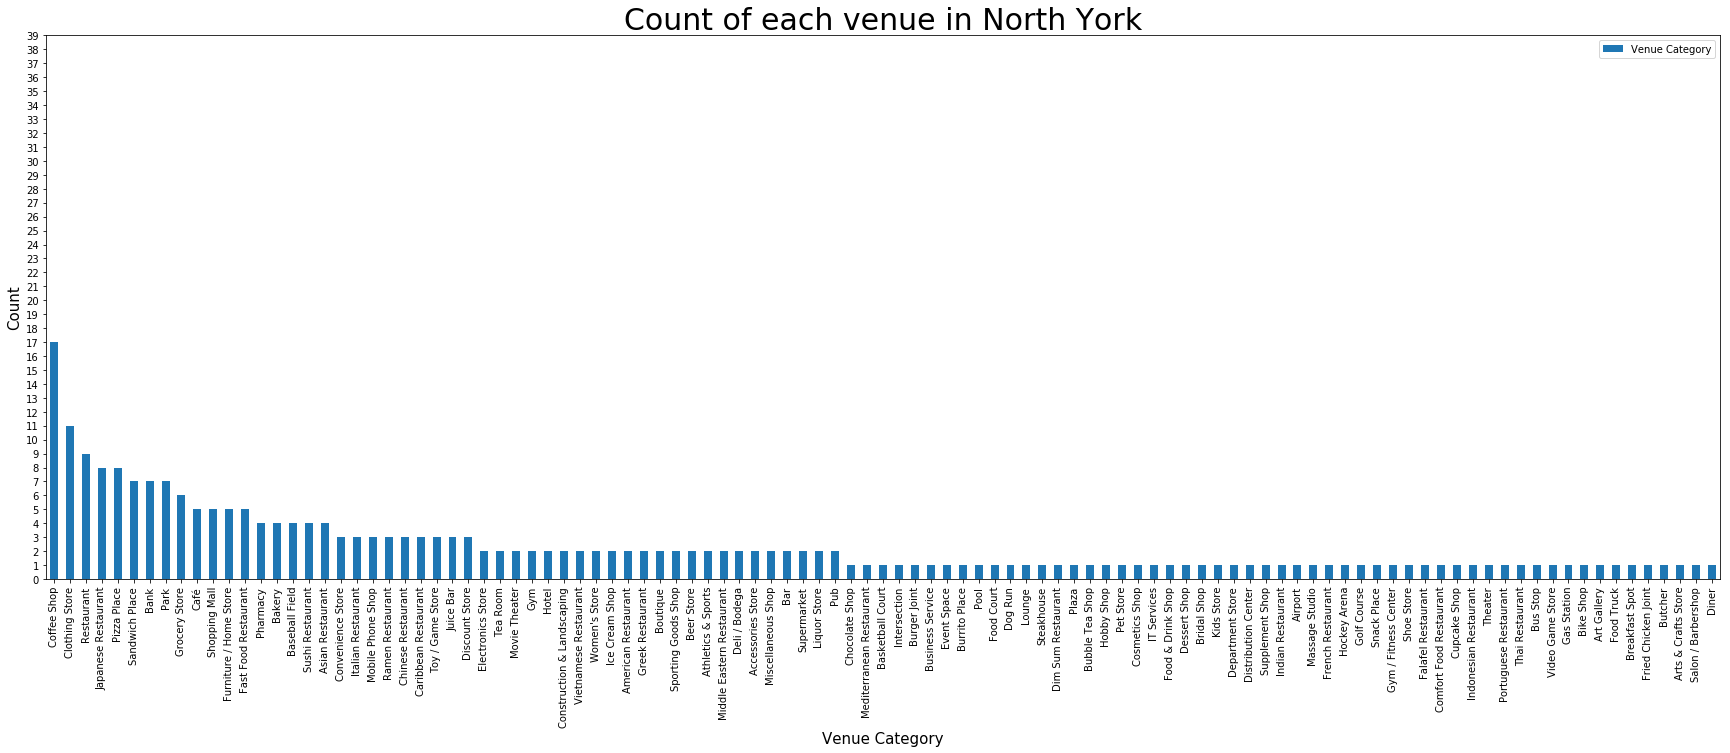

In [38]:
yint = range(0,40)
northyork_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in North York',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 3. East York

In [40]:
eastyork_df = df[df['Borough'] == 'East York'].reset_index(drop=True)
eastyork_df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
1,M4C,East York,Woodbine Heights,43.695344,-79.318389
2,M4G,East York,Leaside,43.709060,-79.363452
3,M4H,East York,Thorncliffe Park,43.705369,-79.349372
4,M4J,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106


<p>We will now explore the neighborhoods of East York for different Venues</p>

In [41]:
eastyork_venues = getNearbyVenues(names=eastyork_df['Neighborhood'],
                                   latitudes=eastyork_df['Latitude'],
                                   longitudes=eastyork_df['Longitude']
                                  )

Parkview Hill, Woodbine Gardens
Woodbine Heights
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)


In [42]:
eastyork_venues.shape

(77, 7)

In [43]:
eastyork_venues['Venue Category'].unique()
eastyork_venue_count=eastyork_venues['Venue Category'].value_counts().to_frame()
eastyork_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Bank,4
Coffee Shop,4
Park,4
Burger Joint,3
Sandwich Place,3
Pizza Place,3
Pharmacy,3
Beer Store,2
Gym,2
Sporting Goods Shop,2


Text(0, 0.5, 'Count')

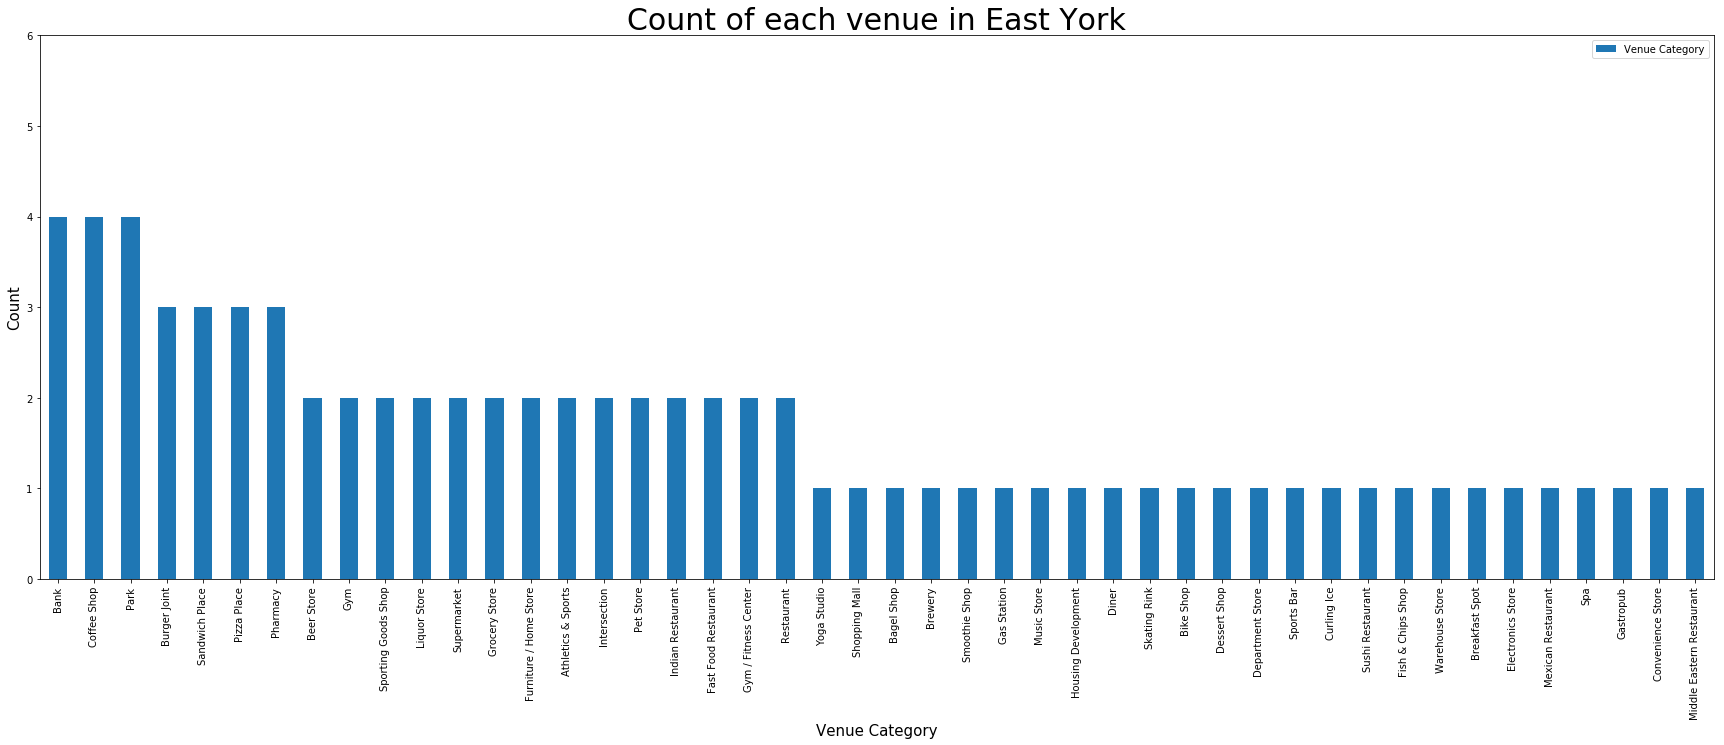

In [44]:
yint = range(0,7)
eastyork_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in East York',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 4. East Toronto

In [46]:
etoro_data = df[df['Borough'] == 'East Toronto'].reset_index(drop=True)
etoro_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558


In [47]:
etoro_venues = getNearbyVenues(names=etoro_data['Neighborhood'],
                                   latitudes=etoro_data['Latitude'],
                                   longitudes=etoro_data['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter Processing Plant Toronto


In [48]:
etoro_venues.shape

(123, 7)

In [49]:
etoro_venues['Venue Category'].unique()
etoro_venue_count=etoro_venues['Venue Category'].value_counts().to_frame()
etoro_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Greek Restaurant,9
Coffee Shop,6
Café,5
Italian Restaurant,5
Brewery,5
Restaurant,4
Ice Cream Shop,4
Park,4
Yoga Studio,3
Fast Food Restaurant,3


Text(0, 0.5, 'Count')

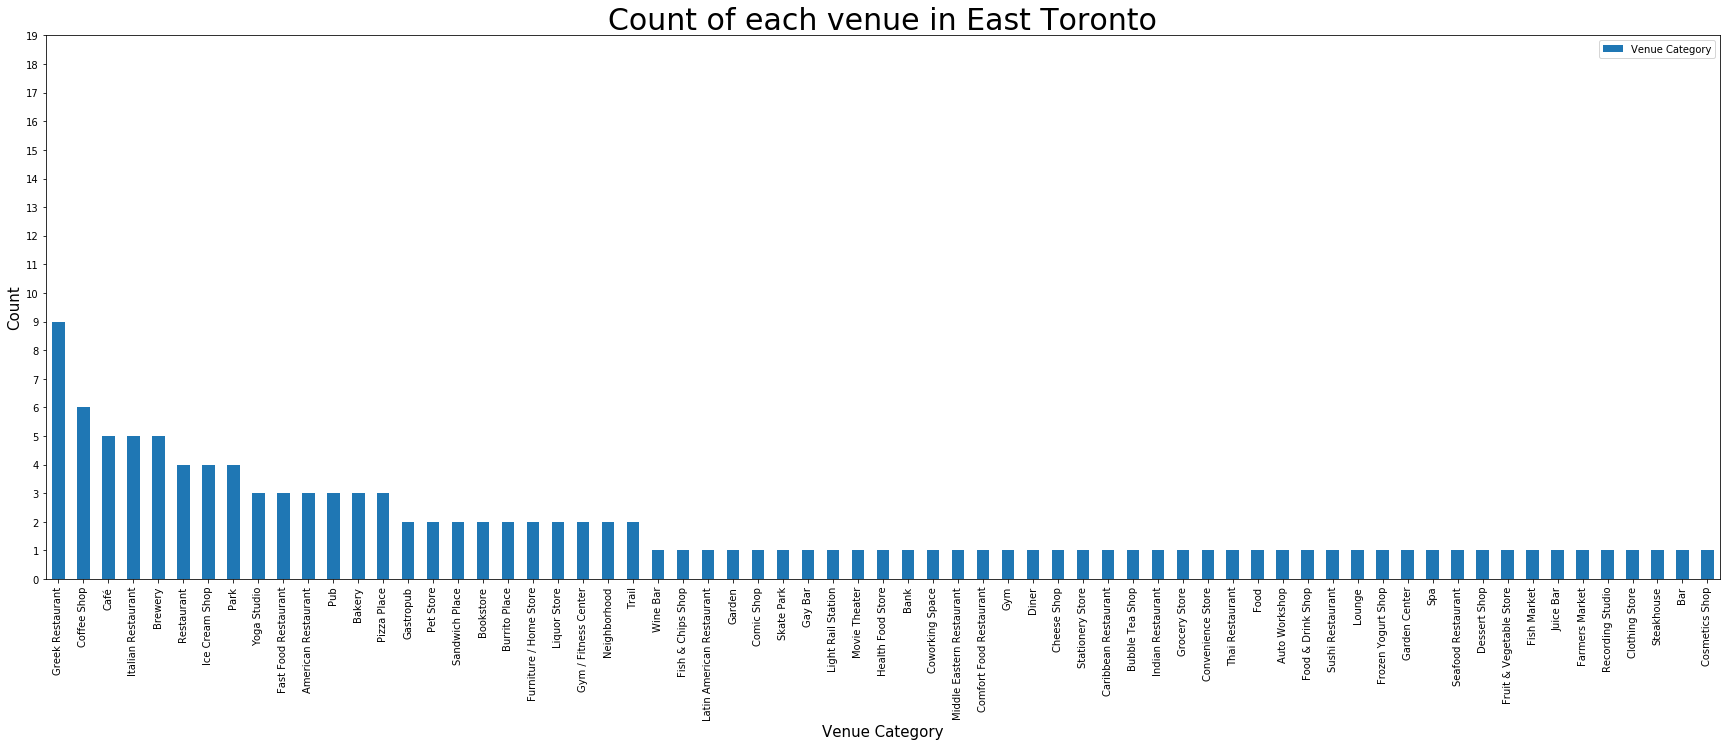

In [50]:
yint = range(0,20)
etoro_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in East Toronto',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 5. Central Toronto

In [51]:
ctoro_data = df[df['Borough'] == 'Central Toronto'].reset_index(drop=True)
ctoro_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
5,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
6,M5N,Central Toronto,Roselawn,43.711695,-79.416936
7,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
8,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678


In [52]:
ctoro_venues = getNearbyVenues(names=ctoro_data['Neighborhood'],
                                   latitudes=ctoro_data['Latitude'],
                                   longitudes=ctoro_data['Longitude']
                                  )

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville


In [53]:
ctoro_venues.shape

(115, 7)

In [54]:
ctoro_venues['Venue Category'].unique()
ctoro_venue_count=ctoro_venues['Venue Category'].value_counts().to_frame()
ctoro_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Coffee Shop,8
Pizza Place,7
Sandwich Place,7
Café,6
Park,6
Restaurant,4
Sushi Restaurant,4
Dessert Shop,3
Pub,3
Trail,2


Text(0, 0.5, 'Count')

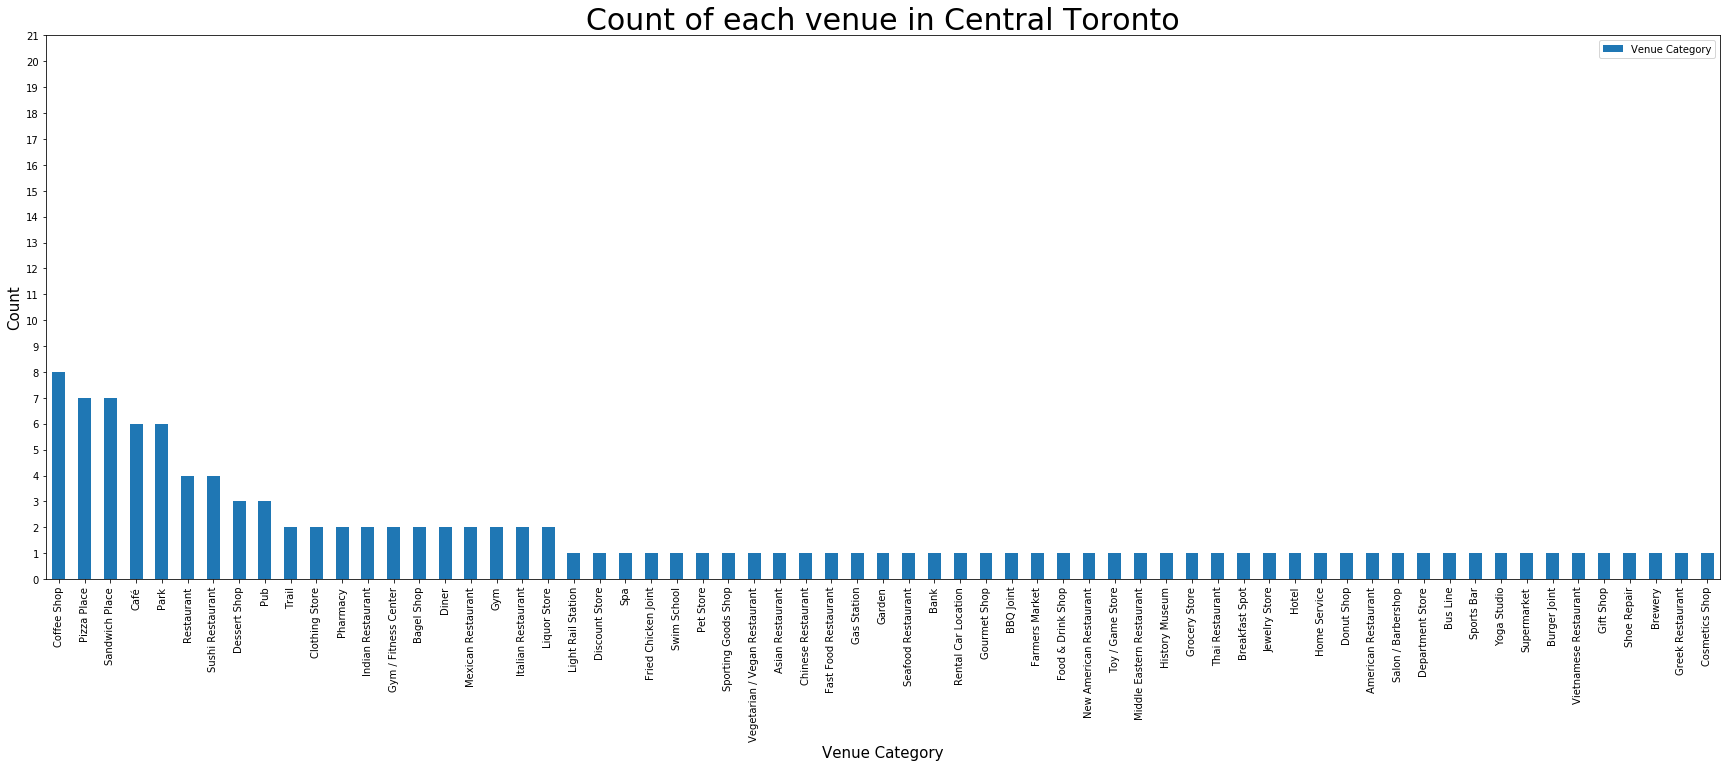

In [55]:
yint = range(0,22)
ctoro_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Central Toronto',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 6. Downtown Toronto

In [56]:
dtoro_data = df[df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
dtoro_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752


In [58]:
dtoro_venues = getNearbyVenues(names=dtoro_data['Neighborhood'],
                                   latitudes=dtoro_data['Latitude'],
                                   longitudes=dtoro_data['Longitude']
                                  )

Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government


In [59]:
dtoro_venues.shape

(1231, 7)

In [60]:
dtoro_venues['Venue Category'].unique()
dtoro_venue_count=dtoro_venues['Venue Category'].value_counts().to_frame()
dtoro_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Coffee Shop,123
Café,69
Restaurant,44
Japanese Restaurant,33
Hotel,31
Italian Restaurant,28
Bakery,26
Seafood Restaurant,20
Park,19
Gym,19


Text(0, 0.5, 'Count')

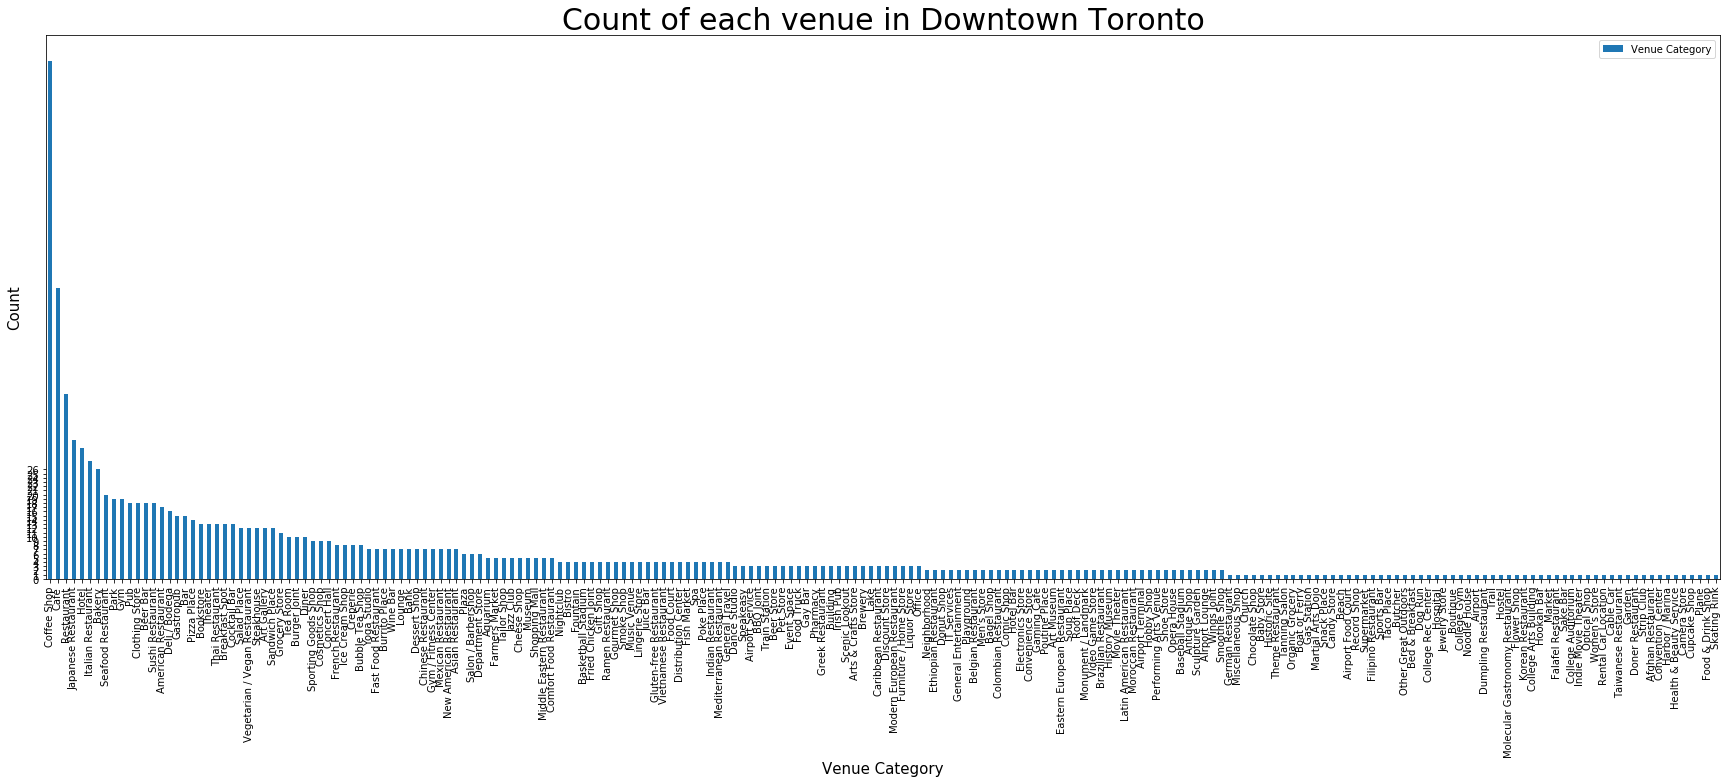

In [74]:
yint = range(0,27)
dtoro_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Downtown Toronto',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 7. York

In [61]:
york_data = df[df['Borough'] == 'York'].reset_index(drop=True)
york_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
2,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
3,M6N,York,"Runnymede, The Junction North",43.673185,-79.487262
4,M9N,York,Weston,43.706876,-79.518188


In [62]:
york_venues = getNearbyVenues(names=york_data['Neighborhood'],
                                   latitudes=york_data['Latitude'],
                                   longitudes=york_data['Longitude']
                                  )

Humewood-Cedarvale
Caledonia-Fairbanks
Del Ray, Mount Dennis, Keelsdale and Silverthorn
Runnymede, The Junction North
Weston


In [63]:
york_venues.shape

(16, 7)

In [64]:
york_venues['Venue Category'].unique()
york_venue_count=eastyork_venues['Venue Category'].value_counts().to_frame()
york_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Bank,4
Coffee Shop,4
Park,4
Burger Joint,3
Sandwich Place,3
Pizza Place,3
Pharmacy,3
Beer Store,2
Gym,2
Sporting Goods Shop,2


Text(0, 0.5, 'Count')

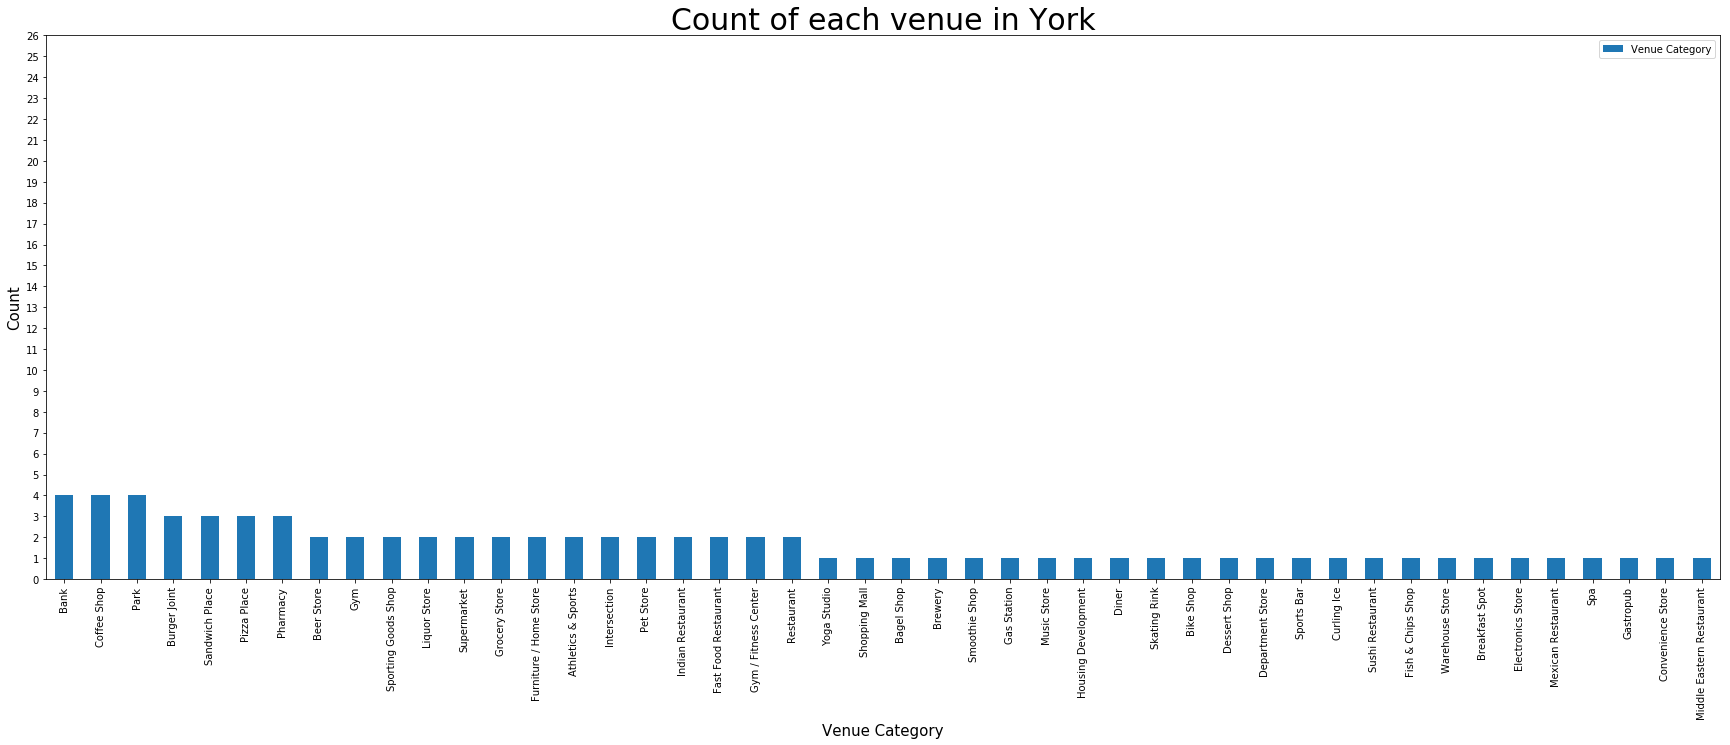

In [73]:
yint = range(0,27)
york_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in York',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 8. West Toronto

In [65]:
wtoro_data = df[df['Borough'] == 'West Toronto'].reset_index(drop=True)
wtoro_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
1,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750
2,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
3,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763
4,M6R,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325
5,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450


In [68]:
wtoro_venues = getNearbyVenues(names=wtoro_data['Neighborhood'],
                                   latitudes=wtoro_data['Latitude'],
                                   longitudes=wtoro_data['Longitude']
                                  )

Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction South
Parkdale, Roncesvalles
Runnymede, Swansea


In [69]:
wtoro_venues.shape

(157, 7)

In [70]:
wtoro_venues['Venue Category'].unique()
wtoro_venue_count=wtoro_venues['Venue Category'].value_counts().to_frame()
wtoro_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Café,11
Bar,10
Coffee Shop,8
Italian Restaurant,6
Restaurant,5
Bakery,4
Breakfast Spot,4
Pizza Place,4
Park,4
Gift Shop,3


Text(0, 0.5, 'Count')

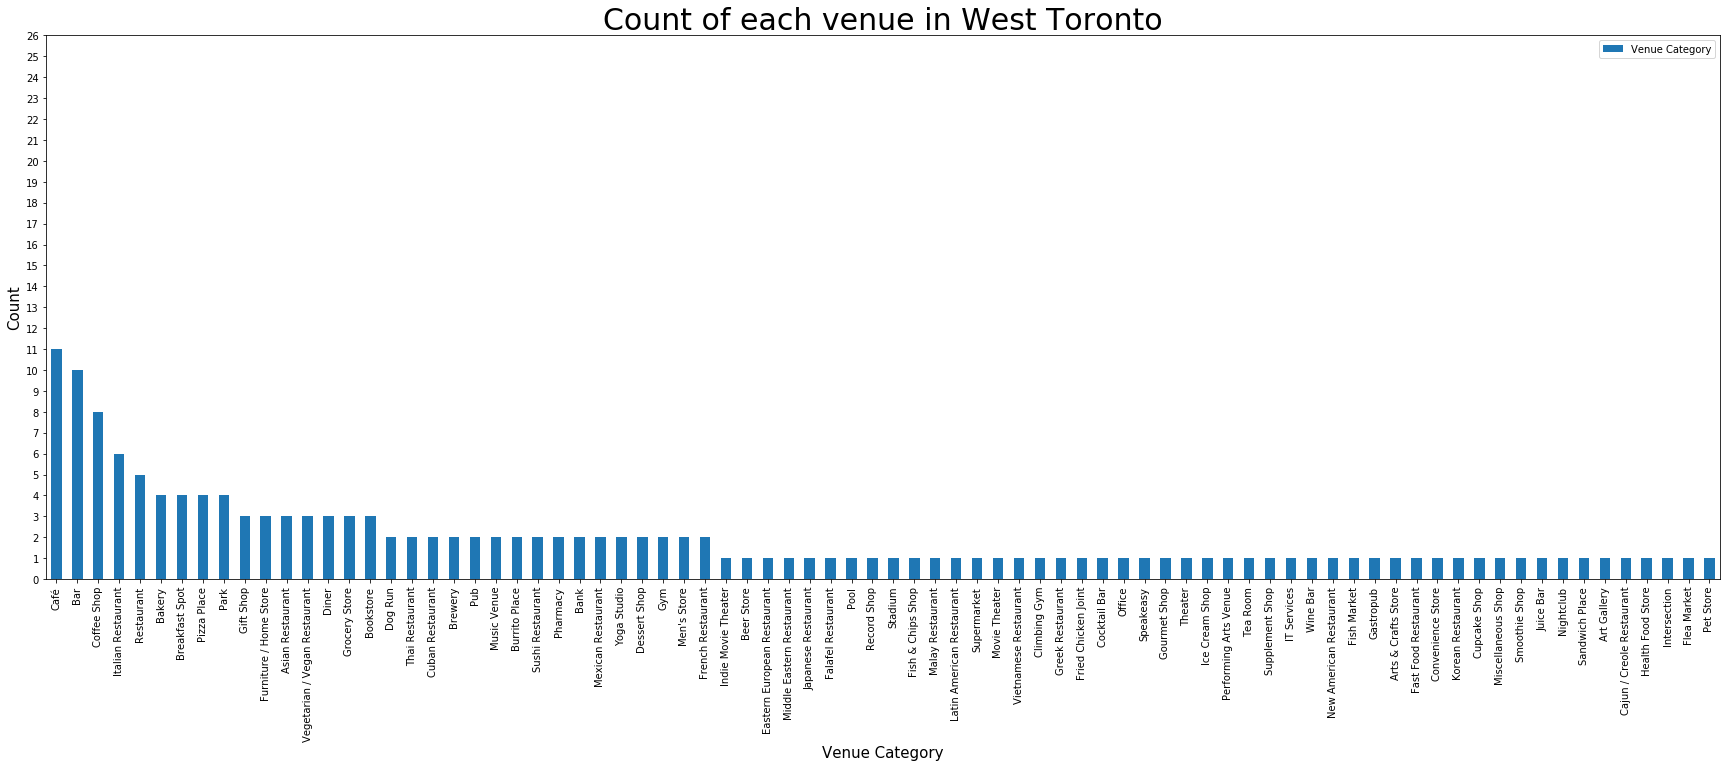

In [71]:
yint = range(0,27)
wtoro_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in West Toronto',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 9. Mississauga

In [75]:
mq_data = df[df['Borough'] == 'Mississauga'].reset_index(drop=True)
mq_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M7R,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819


In [76]:
mq_venues = getNearbyVenues(names=mq_data['Neighborhood'],
                                   latitudes=mq_data['Latitude'],
                                   longitudes=mq_data['Longitude']
                                  )

Canada Post Gateway Processing Centre


In [77]:
mq_venues['Venue Category'].unique()
mq_venue_count=mq_venues['Venue Category'].value_counts().to_frame()
mq_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Hotel,2
Coffee Shop,2
Burrito Place,1
Intersection,1
American Restaurant,1
Middle Eastern Restaurant,1
Mediterranean Restaurant,1
Fried Chicken Joint,1
Gym,1
Sandwich Place,1


Text(0, 0.5, 'Count')

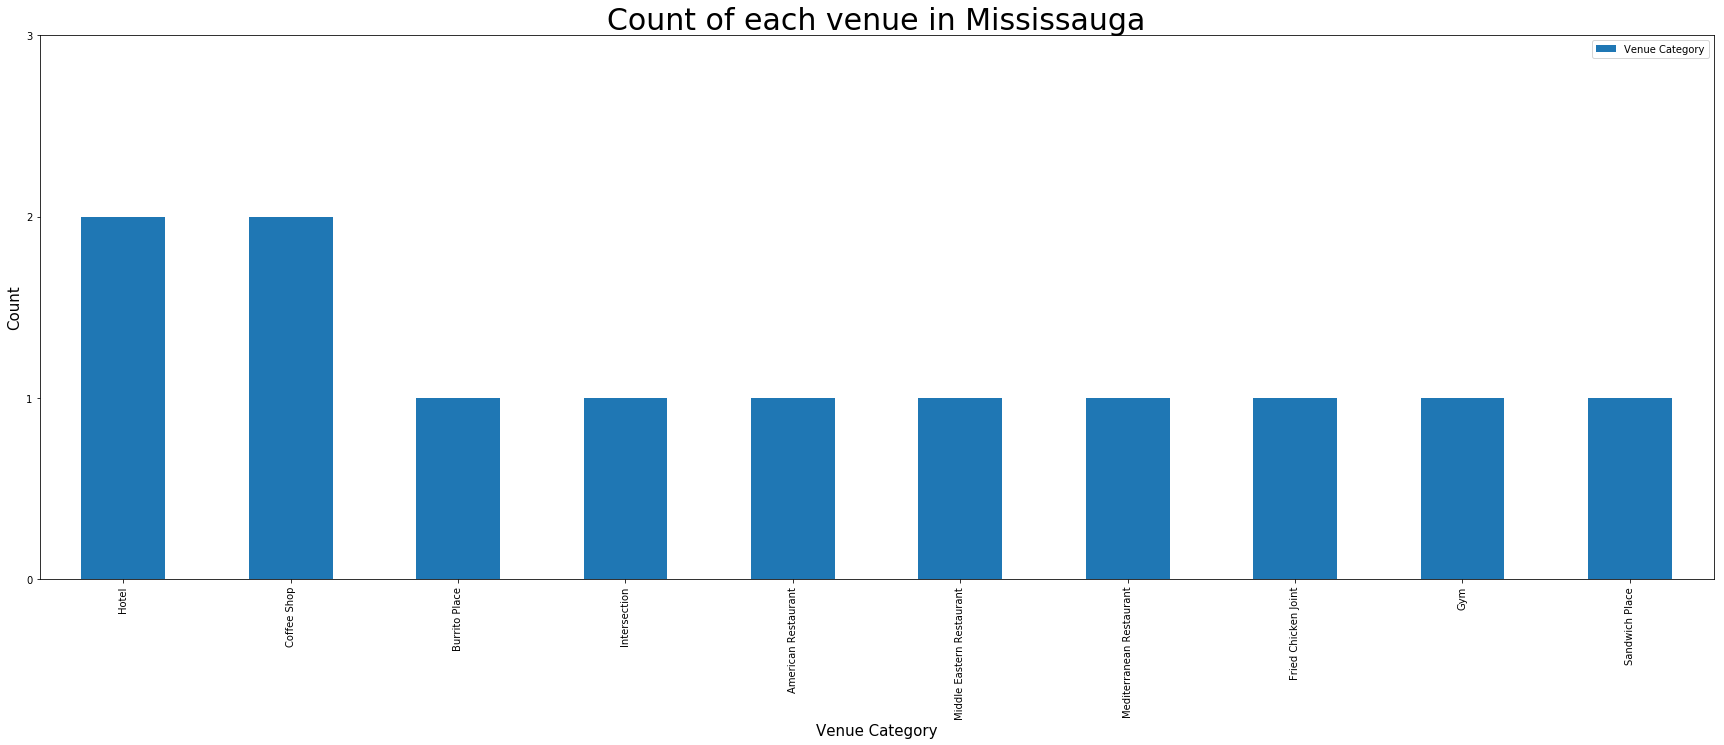

In [78]:
yint = range(0,4)
mq_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Mississauga',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

#### 10. Etobicoke

In [79]:
etobicoke_data = df[df['Borough'] == 'Etobicoke'].reset_index(drop=True)
etobicoke_data

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M8V,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.605647,-79.501321
1,M8W,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484
2,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
3,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509
4,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724
7,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.643515,-79.577201
8,M9P,Etobicoke,Westmount,43.696319,-79.532242
9,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724


In [80]:
etobicoke_venues = getNearbyVenues(names=etobicoke_data['Neighborhood'],
                                   latitudes=etobicoke_data['Latitude'],
                                   longitudes=etobicoke_data['Longitude']
                                  )

New Toronto, Mimico South, Humber Bay Shores
Alderwood, Long Branch
The Kingsway, Montgomery Road, Old Mill North
Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East
Mimico NW, The Queensway West, South of Bloor, Kingsway Park South West, Royal York South West
Islington Avenue, Humber Valley Village
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Westmount
Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens
South Steeles, Silverstone, Humbergate, Jamestown, Mount Olive, Beaumond Heights, Thistletown, Albion Gardens
Northwest, West Humber - Clairville


In [81]:
etobicoke_venues.shape

(68, 7)

In [82]:
etobicoke_venues['Venue Category'].unique()
etobicoke_venue_count=etobicoke_venues['Venue Category'].value_counts().to_frame()
etobicoke_venue_count.rename(columns={'Venue Category':'Count'})

,Count
Pizza Place,8
Sandwich Place,5
Pharmacy,4
Grocery Store,3
Fast Food Restaurant,3
Gym,3
Coffee Shop,3
Park,2
Discount Store,2
Café,2


Text(0, 0.5, 'Count')

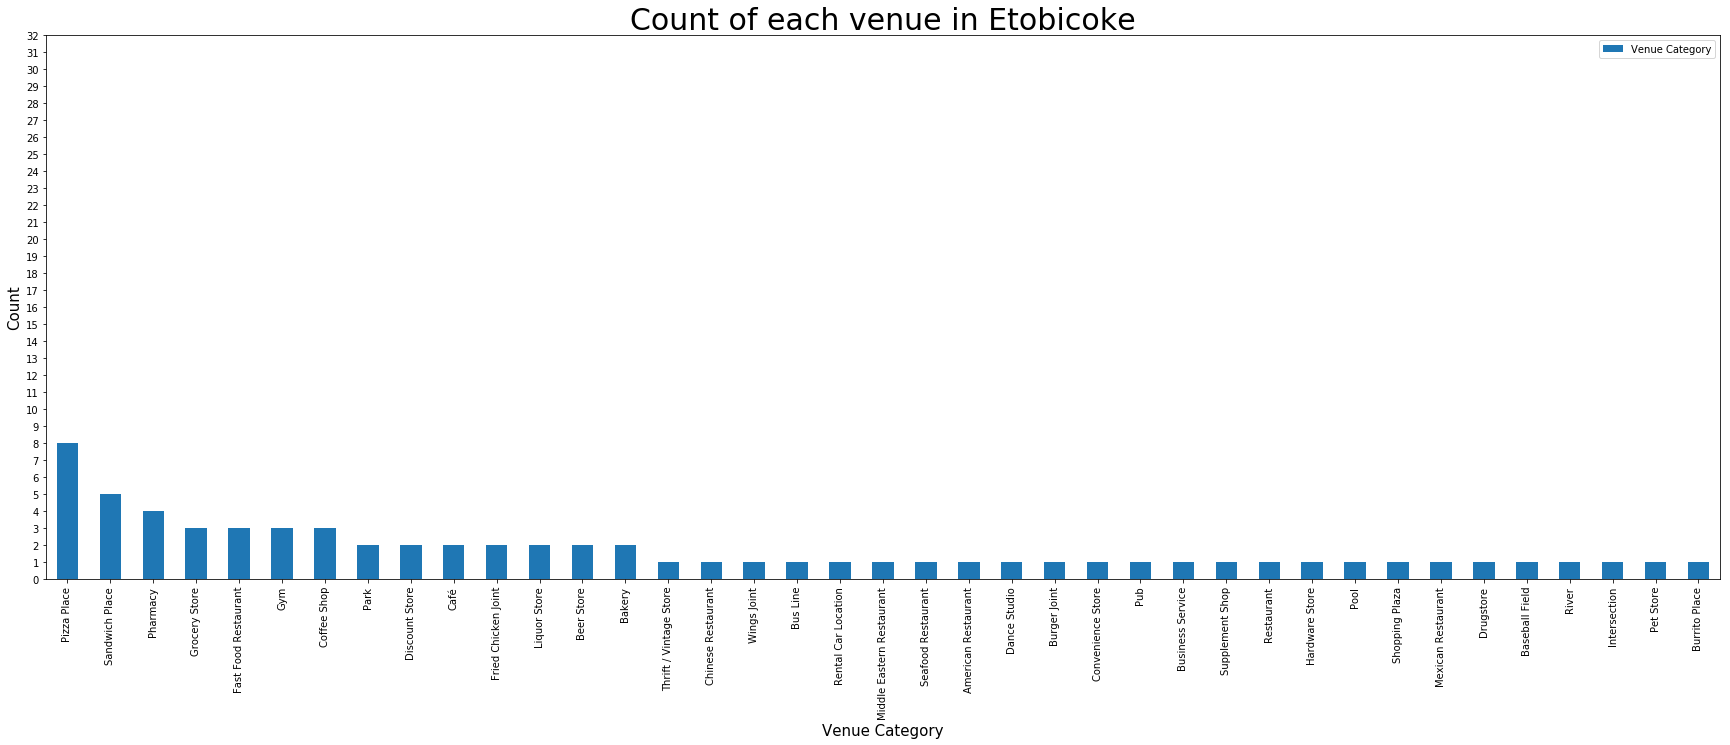

In [83]:
yint = range(0,33)
etobicoke_venue_count.plot(kind='bar', figsize=(30,10))
plt.yticks(yint)
plt.title('Count of each venue in Etobicoke',fontsize=30)
plt.xlabel('Venue Category', fontsize=15)
plt.ylabel('Count',fontsize=15)

<p>Now that we have completed the exploration of all the Boroughs and Neighborhoods. We will shift our attention on the second aspect of this project which would include, finding an ideal location for a person to open a Chinese restaurant in Toronto</p>

In [84]:
def getNearbyVenuess(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [85]:
toro_venues = getNearbyVenuess(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [86]:
toro_venues.shape

(3409, 7)

<p>Hence we have searched 3409 venues in whole Toronto City</p>

In [87]:
t=toro_venues['Neighborhood'].unique()
t.size

97

In [88]:
df_comb=pd.merge(df, toro_venues, left_on='Neighborhood', right_on='Neighborhood', how='right')

In [89]:
df_comb.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
2,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,43.806686,-79.194353,Tim Hortons,43.802000,-79.198169,Coffee Shop
3,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,43.806686,-79.194353,Lee Valley,43.803161,-79.199681,Hobby Shop
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa


<p>We will drop columns that are not required in our analysis as of now</p>

In [90]:
df_comb.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude'],inplace=True,axis=1)

In [91]:
df_combine=df_comb['Neighborhood'].unique()
df_combine.size

97

In [93]:
df_comb.rename(columns={'Venue Category':'Category'}, inplace=True)
df_comb.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Venue,Category
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,Fast Food Restaurant
1,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Wendy's,Fast Food Restaurant
2,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Tim Hortons,Coffee Shop
3,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Lee Valley,Hobby Shop
4,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Images Salon & Spa,Spa


<p>We now extract all the Chinese Restaurants from the combine table df_comb</p>

In [95]:
df_chinese_toro = df_comb[df_comb.Category == 'Chinese Restaurant']
df_chinese_toro = df_chinese_toro.reset_index(drop=True)
df_chinese_toro.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Venue,Category
0,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,Hakka Legend,Chinese Restaurant
1,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,Super Choy Restaurant,Chinese Restaurant
2,M1P,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,Kim Kim restaurant,Chinese Restaurant
3,M1T,Scarborough,"Clarks Corners, Tam O'Shanter, Sullivan",43.781638,-79.304302,The Royal Chinese Restaurant 避風塘小炒,Chinese Restaurant
4,M1V,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",43.815252,-79.284577,Fortune Restaurant,Chinese Restaurant


In [98]:
chinese_rest_count=df_chinese_toro['Borough'].value_counts().to_frame()
chinese_rest_count.rename(columns={'Borough':'Count of Chinese Restaurant'}, inplace=True)
chinese_rest_count

,Count of Chinese Restaurant
Downtown Toronto,8
North York,8
Scarborough,7
Mississauga,5
Etobicoke,2
West Toronto,1
Central Toronto,1
East Toronto,1


<p>Now we will visualize it</p>

Text(0, 0.5, 'Count')

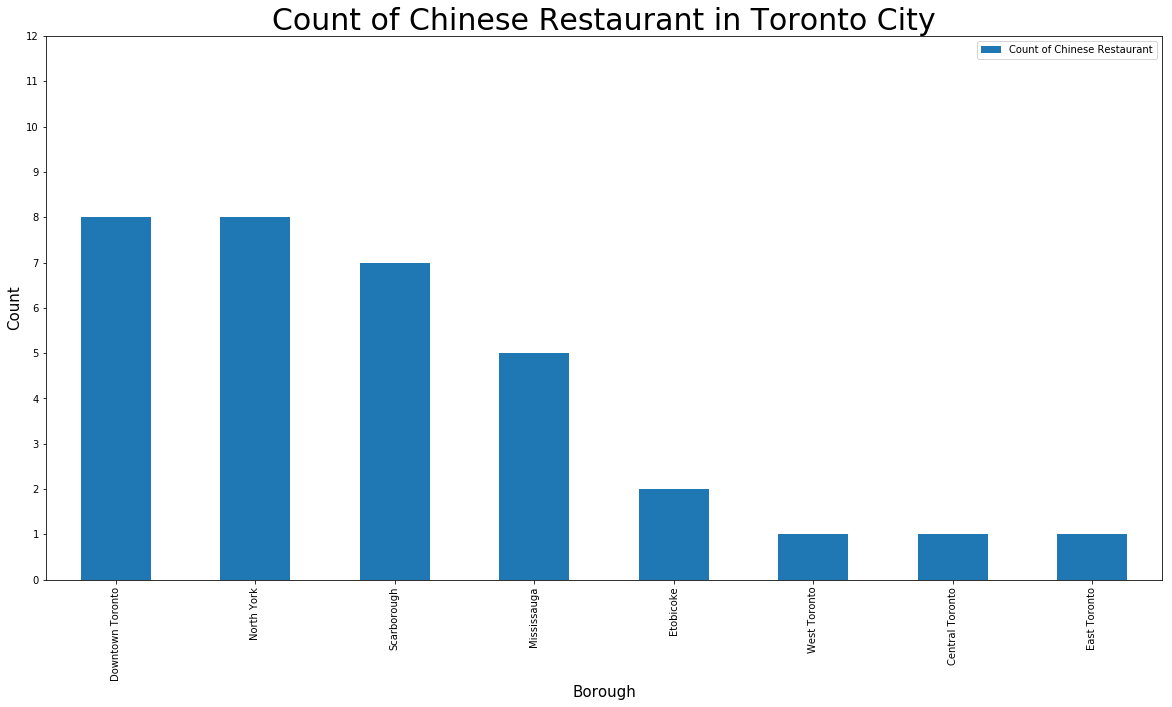

In [99]:
import matplotlib.pyplot as plt
yint = range(0,13)
chinese_rest_count.plot(kind='bar', figsize=(20,10))
plt.yticks(yint)
plt.title('Count of Chinese Restaurant in Toronto City',fontsize=30)
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Count',fontsize=15)

<p>Now we will plot the above acquired number of Chinese Reataurants on a map</p>

In [102]:
latitude=43.6352
longitude=-79.3832
# Blank Map of Toronto
toro_map = folium.Map(location=[latitude, longitude], zoom_start=12)
toro_map

<p>Now we will pre-process our data to display on above map</p>

In [103]:
toro_venues.drop(['Neighborhood Latitude','Neighborhood Longitude'],inplace=True,axis=1)
toro_venues.head()

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Malvern, Rouge",Wendy's,43.802008,-79.198080,Fast Food Restaurant
2,"Malvern, Rouge",Tim Hortons,43.802000,-79.198169,Coffee Shop
3,"Malvern, Rouge",Lee Valley,43.803161,-79.199681,Hobby Shop
4,"Malvern, Rouge",Images Salon & Spa,43.802283,-79.198565,Spa


In [104]:
toro_venues.rename(columns={'Venue Latitude':'Latitude','Venue Longitude':'Longitude'}, inplace=True)
toro_venues.rename(columns={'Venue Category':'Category'}, inplace=True)
toro_venues.head()

,Neighborhood,Venue,Latitude,Longitude,Category
0,"Malvern, Rouge",Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Malvern, Rouge",Wendy's,43.802008,-79.198080,Fast Food Restaurant
2,"Malvern, Rouge",Tim Hortons,43.802000,-79.198169,Coffee Shop
3,"Malvern, Rouge",Lee Valley,43.803161,-79.199681,Hobby Shop
4,"Malvern, Rouge",Images Salon & Spa,43.802283,-79.198565,Spa


In [105]:
toro_venues_count = toro_venues[toro_venues.Category == 'Chinese Restaurant']
toro_venues_count = toro_venues_count[toro_venues_count.Neighborhood != 'Not assigned']
toro_venues_count.reset_index(drop=True)

,Neighborhood,Venue,Latitude,Longitude,Category
0,Cedarbrae,Hakka Legend,43.776309,-79.234939,Chinese Restaurant
1,"Cliffside, Cliffcrest, Scarborough Village West",Super Choy Restaurant,43.721289,-79.236698,Chinese Restaurant
2,"Dorset Park, Wexford Heights, Scarborough Town...",Kim Kim restaurant,43.753833,-79.276611,Chinese Restaurant
3,"Clarks Corners, Tam O'Shanter, Sullivan",The Royal Chinese Restaurant 避風塘小炒,43.780505,-79.298844,Chinese Restaurant
4,"Milliken, Agincourt North, Steeles East, L'Amo...",Fortune Restaurant,43.813722,-79.291892,Chinese Restaurant
5,"Steeles West, L'Amoreaux West",Mr Congee Chinese Cuisine 龍粥記,43.798879,-79.318335,Chinese Restaurant
6,"Steeles West, L'Amoreaux West",Phoenix Restaurant 金鳳餐廳,43.798198,-79.318432,Chinese Restaurant
7,Hillcrest Village,New Greattime Corp.,43.807414,-79.356717,Chinese Restaurant
8,Bayview Village,Sun Star Chinese Cuisine 翠景小炒,43.787914,-79.381234,Chinese Restaurant
9,Don Mills,Congee Star 帝王名粥,43.726586,-79.341833,Chinese Restaurant


### 3.2 Data Aggregation

<p>Now we will aggregate total number of Chinese Restaurants per Neighborhood</p>

In [107]:
toro_venues_counting=toro_venues_count['Neighborhood'].value_counts().to_frame().reset_index()
toro_venues_counting.rename(columns={'index':'Neighborhood','Neighborhood':'Count'}, inplace=True)
toro_venues_counting.head()

,Neighborhood,Count
0,Canada Post Gateway Processing Centre,5
1,Central Bay Street,3
2,"Steeles West, L'Amoreaux West",2
3,"St. James Town, Cabbagetown",2
4,Westmount,1


In [109]:
finalDf=df.drop(['Borough','Postal Code'],axis=1)
finalDf.head()

,Neighborhood,Latitude,Longitude
0,"Malvern, Rouge",43.806686,-79.194353
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Woburn,43.770992,-79.216917
4,Cedarbrae,43.773136,-79.239476


In [110]:
toro_venues_count_final=pd.merge(toro_venues_counting, finalDf, on='Neighborhood',how='left')
toro_venues_count_final['Count']=toro_venues_counting['Count'].astype('str')
toro_venues_count_final.head()

,Neighborhood,Count,Latitude,Longitude
0,Canada Post Gateway Processing Centre,5,43.636966,-79.615819
1,Central Bay Street,3,43.657952,-79.387383
2,"Steeles West, L'Amoreaux West",2,43.799525,-79.318389
3,"St. James Town, Cabbagetown",2,43.667967,-79.367675
4,Westmount,1,43.696319,-79.532242


In [120]:
toro_venues_count_final.dtypes

Neighborhood     object
Count            object
Latitude        float64
Longitude       float64
dtype: object

<p>Displaying a map, with each label when clicked, displays the number of Chinese Restaurants in that neighborhood</p>

In [125]:
toro_map = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, label in zip(toro_venues_count_final.Latitude, toro_venues_count_final.Longitude,toro_venues_count_final.Count):
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, 
            color='blue',
            fill=True,
            fill_color='blue'            
        ).add_to(toro_map)
    
toro_map

## 4. Results

<p>As in introduction we established that it will be best choice to open a new Chinese Restaurant in area where competition will be less so hence below our result table shows that number of Chinese restaurant in each Borough-wise analysis.</p>

In [126]:
chinese_rest_count=df_chinese_toro['Borough'].value_counts().to_frame()
chinese_rest_count.rename(columns={'Borough':'Count of Chinese Restaurant'}, inplace=True)
chinese_rest_count

,Count of Chinese Restaurant
Downtown Toronto,8
North York,8
Scarborough,7
Mississauga,5
Etobicoke,2
West Toronto,1
Central Toronto,1
East Toronto,1


<p>Above table clearly shows that <b>Downtown Toronto</b>, <b>North York</b> and <b>Scarborough</b> have more number of Chinese Restaurants</p>

<p>Also we can clearly say that <b>York</b> and <b>Queen's Park</b> have no Chinese Restaurant, so these two may be best Boroughs for opening a new Chinese Restaurant.</p>

<p>If we apply Neighborhood-wise Analysis, we get following table:</p>

In [127]:
toro_venues_counting

,Neighborhood,Count
0,Canada Post Gateway Processing Centre,5
1,Central Bay Street,3
2,"Steeles West, L'Amoreaux West",2
3,"St. James Town, Cabbagetown",2
4,Westmount,1
5,Cedarbrae,1
6,"Little Portugal, Trinity",1
7,Downsview,1
8,Don Mills,1
9,"Milliken, Agincourt North, Steeles East, L'Amo...",1


<p>Above table show count of Chinese Restaurants in each Neighborhood we can now easily tell which Neighborhood will be best for opening a new Chinese Restaurant</p>

## 5. Conclusion

<p>During this capstone project, I was able to apply different data science techniques and tools that I learned. This helped me unearth meaningful insights from the data analysis that I did on the Toronto data set. The aspects I uncovered during the phase of data analysis are listed below</p>

<li>Through Borough-wise analysis we can say that <b>York</b> and <b>Queen's Park</b> are best Boroughs in Toronto for opening a new Chinese Restaurant</li>
<li>Through Neighborhood-wise analysis we can say that <b>Canada Post Gateway Processing Centre</b> has more Chinese Restaurants and thus not suitable for opening a new Chinese Resturant, while those Neighbhoorhoods with frequency of 0 and 1 count can be considered instead.</li>